<a href="https://colab.research.google.com/github/codebuzer/Bioactivity-Prediction-App/blob/main/regressionplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [239]:
test = pd.read_csv("/content/drive/MyDrive/test (1).csv", index_col = 0)

In [240]:
train = pd.read_csv("/content/drive/MyDrive/train (2).csv", index_col = 0)

In [241]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_D', 'batch_E',
       'batch_F', 'batch_G', 'batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T', 'batch_U', 'ctnum_median_status',
       'infection'],
      dtype='object')

In [242]:
test.columns
test = test.drop(['V19'], axis = 1)
train=train.drop(['batch_D'], axis = 1)

In [243]:
test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F',
       'batch_G', 'batch_H', 'batch_I', 'batch_J', 'batch_K', 'batch_L',
       'batch_M', 'batch_N', 'batch_O', 'batch_P', 'batch_Q', 'batch_R',
       'batch_S', 'batch_T', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [244]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F',
       'batch_G', 'batch_H', 'batch_I', 'batch_J', 'batch_K', 'batch_L',
       'batch_M', 'batch_N', 'batch_O', 'batch_P', 'batch_Q', 'batch_R',
       'batch_S', 'batch_T', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [245]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 0 to 651
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   V1                   652 non-null    float64
 1   V2                   652 non-null    float64
 2   V3                   652 non-null    float64
 3   V4                   652 non-null    float64
 4   V5                   652 non-null    float64
 5   V6                   652 non-null    float64
 6   V7                   652 non-null    float64
 7   V8                   652 non-null    float64
 8   V9                   652 non-null    float64
 9   V10                  652 non-null    float64
 10  V11                  652 non-null    float64
 11  V12                  652 non-null    float64
 12  V13                  652 non-null    float64
 13  V14                  652 non-null    float64
 14  V15                  652 non-null    float64
 15  V16                  652 non-null    flo

In [246]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 418 to 395
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   V1                   121 non-null    float64
 1   V2                   121 non-null    float64
 2   V3                   121 non-null    float64
 3   V4                   121 non-null    float64
 4   V5                   121 non-null    float64
 5   V6                   121 non-null    float64
 6   V7                   121 non-null    float64
 7   V8                   121 non-null    float64
 8   V9                   121 non-null    float64
 9   V10                  121 non-null    float64
 10  V11                  121 non-null    float64
 11  V12                  121 non-null    float64
 12  V13                  121 non-null    float64
 13  V14                  121 non-null    float64
 14  V15                  121 non-null    float64
 15  V16                  121 non-null    f

In [247]:
test.duplicated().sum()

0

In [248]:
train.duplicated().sum()

0

In [249]:
train.isnull().sum()

V1                     0
V2                     0
V3                     0
V4                     0
V5                     0
V6                     0
V7                     0
V8                     0
V9                     0
V10                    0
V11                    0
V12                    0
V13                    0
V14                    0
V15                    0
V16                    0
V17                    0
V18                    0
V20                    0
V21                    0
V22                    0
V23                    0
V24                    0
V25                    0
V26                    0
V27                    0
V28                    0
V29                    0
V30                    0
V31                    0
V32                    0
V33                    0
V34                    0
V35                    0
V36                    0
V37                    0
V38                    0
V39                    0
V40                    0
V41                    0


In [250]:
test.isnull().sum()

V1                     0
V2                     0
V3                     0
V4                     0
V5                     0
V6                     0
V7                     0
V8                     0
V9                     0
V10                    0
V11                    0
V12                    0
V13                    0
V14                    0
V15                    0
V16                    0
V17                    0
V18                    0
V20                    0
V21                    0
V22                    0
V23                    0
V24                    0
V25                    0
V26                    0
V27                    0
V28                    0
V29                    0
V30                    0
V31                    0
V32                    0
V33                    0
V34                    0
V35                    0
V36                    0
V37                    0
V38                    0
V39                    0
V40                    0
V41                    0


In [251]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


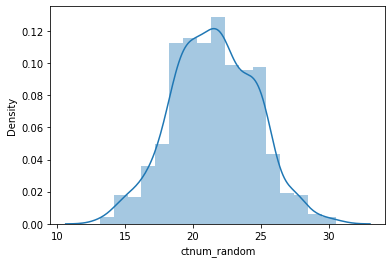

In [252]:
sns.distplot(train['ctnum_random'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


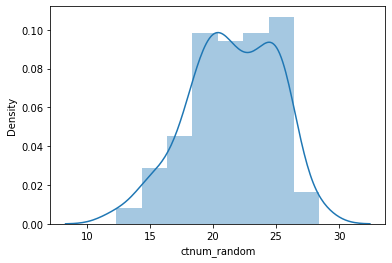

In [253]:
sns.distplot(test['ctnum_random'])

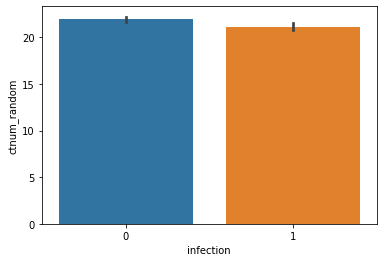

In [254]:
sns.barplot(x=train['infection'],y=train['ctnum_random'])

In [255]:
pd.pandas.set_option('display.max_rows',None)
train.corr()['ctnum_random']

V1                    -0.025067
V2                    -0.061585
V3                    -0.098421
V4                    -0.082355
V5                     0.017850
V6                    -0.164808
V7                    -0.124930
V8                    -0.069540
V9                    -0.159292
V10                   -0.100595
V11                   -0.110652
V12                    0.009389
V13                    0.027725
V14                    0.082271
V15                   -0.193179
V16                    0.165661
V17                   -0.170170
V18                   -0.333443
V20                    0.024977
V21                    0.134757
V22                   -0.099449
V23                   -0.126362
V24                   -0.185747
V25                   -0.197961
V26                   -0.217404
V27                   -0.094959
V28                   -0.115258
V29                   -0.115456
V30                    0.161580
V31                   -0.069217
V32                    0.134918
V33     

In [256]:
X_train = train.drop(['ctnum_random'], axis = 1)
y_train = train['ctnum_random']
X_test = test.drop(['ctnum_random'], axis = 1)
y_test = test['ctnum_random']

In [257]:
X_train = X_train.drop(['batch_S','batch_M','batch_K','batch_G','batch_C','V34','agenum_random','V20','V17'], axis = 1)
X_test = X_test.drop(['batch_S','batch_M','batch_K','batch_G','batch_C','V34','agenum_random','V20','V17'], axis = 1)

In [258]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


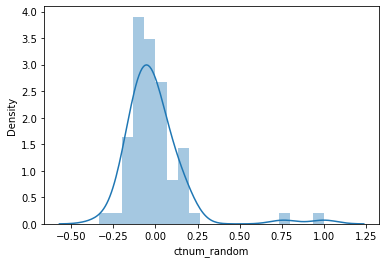

In [259]:
sns.distplot(train.corr()['ctnum_random'])

In [260]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [261]:
lr = LinearRegression()

lr.fit(X_train, y_train)



y_pred_lr = lr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_lr))
print('MAE',mean_absolute_error(y_test,y_pred_lr))
r2_scr_lr = r2_score(y_test,y_pred_lr)
mae_lr = mean_absolute_error(y_test,y_pred_lr)

R2 score 0.6536165953850464
MAE 1.599971603877135


In [262]:
Rr = Ridge(alpha=4)


Rr.fit(X_train,y_train)

y_pred_Rr = Rr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_Rr))
print('MAE',mean_absolute_error(y_test,y_pred_Rr))
r2_scr_Rr = r2_score(y_test,y_pred_Rr)
mae_Rr = mean_absolute_error(y_test,y_pred_Rr)


R2 score 0.6778018544923685
MAE 1.5397763021438058


In [263]:
lsr = Lasso(alpha=0.008)


lsr.fit(X_train,y_train)

y_pred_lsr = lsr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_lsr))
print('MAE',mean_absolute_error(y_test,y_pred_lsr))
r2_scr_lsr = r2_score(y_test,y_pred_lsr)
mae_lsr = mean_absolute_error(y_test,y_pred_lsr)


R2 score 0.6867840599152291
MAE 1.505479515397348


In [264]:
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)

y_pred_kn = knn.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_kn))
r2_scr_kn = r2_score(y_test,y_pred_kn)
mae_kn = mean_absolute_error(y_test,y_pred_kn)

R2 score 0.43631312588089777


In [265]:
dt = DecisionTreeRegressor(max_depth=42)


dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_dt))
print('MAE',mean_absolute_error(y_test,y_pred_dt))
r2_scr_dt = r2_score(y_test,y_pred_dt)
mae_dt = mean_absolute_error(y_test,y_pred_dt)

R2 score 0.33619765928706313
MAE 2.1963367028598886


In [266]:
svr = SVR(kernel='rbf',C=10000,epsilon=1.71)

svr.fit(X_train,y_train)

y_pred_svr = svr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_svr))
print('MAE',mean_absolute_error(y_test,y_pred_svr))
r2_scr_svr = r2_score(y_test,y_pred_svr)
mae_svr = mean_absolute_error(y_test,y_pred_svr)

R2 score 0.5991319120946275
MAE 1.7226201908914542


In [267]:
rf = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.6,
                              max_features=0.75,
                              max_depth=4)


rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_rf))
print('MAE',mean_absolute_error(y_test,y_pred_rf))
r2_scr_rf = r2_score(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)

R2 score 0.6834555058245391
MAE 1.5179870474955286


In [268]:
etr = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=10,
                              bootstrap = True)


etr.fit(X_train,y_train)

y_pred_etr = etr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_etr))
print('MAE',mean_absolute_error(y_test,y_pred_etr))
r2_scr_etr = r2_score(y_test,y_pred_etr)
mae_etr = mean_absolute_error(y_test,y_pred_etr)

R2 score 0.6588659926261444
MAE 1.5988913865485892


In [269]:
adb = AdaBoostRegressor(n_estimators=15,learning_rate=0.001)

adb.fit(X_train,y_train)

y_pred_adb = adb.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_adb))
print('MAE',mean_absolute_error(y_test,y_pred_adb))
r2_scr_adb = r2_score(y_test,y_pred_adb)
mae_adb = mean_absolute_error(y_test,y_pred_adb)

R2 score 0.6803960729302085
MAE 1.5780418970151862


In [270]:
gb = GradientBoostingRegressor(n_estimators=500)

gb.fit(X_train,y_train)

y_pred_gb = gb.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_gb))
print('MAE',mean_absolute_error(y_test,y_pred_gb))
r2_scr_gb = r2_score(y_test,y_pred_gb)
mae_gb = mean_absolute_error(y_test,y_pred_gb)

R2 score 0.6360940648193283
MAE 1.6331826403509515


In [271]:
xgb = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.11)


xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_xgb))
print('MAE',mean_absolute_error(y_test,y_pred_xgb))
r2_scr_xgb = r2_score(y_test,y_pred_xgb)
mae_xgb = mean_absolute_error(y_test,y_pred_xgb)

[16:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.6703887672321
MAE 1.542414274887211


In [272]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.11,max_depth=5, bootstrap = True)
et = ExtraTreesRegressor(n_estimators=150,random_state=3,max_samples=0.5,max_features=0.75,max_depth=3, bootstrap = True)

vtrg = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])



vtrg.fit(X_train,y_train)

y_pred_vtrg = vtrg.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_vtrg))
print('MAE',mean_absolute_error(y_test,y_pred_vtrg))
r2_scr_vtrg = r2_score(y_test,y_pred_vtrg)
mae_vtrg = mean_absolute_error(y_test,y_pred_vtrg)

[16:37:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.6768516927837844
MAE 1.5413115234842858


In [273]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

stk = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

stk.fit(X_train,y_train)

y_pred_stk = stk.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_stk))
print('MAE',mean_absolute_error(y_test,y_pred_stk))
r2_scr_stk = r2_score(y_test,y_pred_stk)
mae_stk = mean_absolute_error(y_test,y_pred_stk)

[16:37:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.6776356687778711
MAE 1.5173018105609848


In [274]:
result = pd.DataFrame()
result['Actual ctnum_random'] = y_test
result['Linear Regression Prediction'] = y_pred_lr
result['Extra Tree Prediction'] = y_pred_dt
result['Stacking Prediction'] = y_pred_stk
result['Random forest Prediction'] = y_pred_rf
result['XgBoost Prediction'] = y_pred_xgb
result['AdaBoost Prediction'] = y_pred_adb
result['Voting Prediction'] = y_pred_vtrg
result['Lasso Prediction'] = y_pred_lsr
result['Knn Prediction'] = y_pred_kn
result['Ridge Prediction'] = y_pred_Rr
result['Decision Tree Prediction'] = y_pred_dt

In [282]:
result = result.to_csv("result_reression.csv")

In [276]:
R2_score = pd.DataFrame()
R2_score['Ideal r2_score'] = [1]
R2_score['Linear Regression r2_score'] = r2_scr_lr
R2_score['Extra Tree r2_score'] = r2_scr_etr
R2_score['Stacking r2_score'] = r2_scr_stk
R2_score['Random forest r2_score'] = r2_scr_rf
R2_score['XgBoost r2_score'] = r2_scr_xgb
R2_score['AdaBoost r2_score'] = r2_scr_adb
R2_score['Voting r2_score'] = r2_scr_vtrg
R2_score['Lasso r2_score'] = r2_scr_lsr
R2_score['Knn r2_score'] = r2_scr_kn
R2_score['Ridge r2_score'] = r2_scr_Rr
R2_score['Decision Tree r2_score'] = r2_scr_dt

In [277]:
R2_score.columns

Index(['Ideal r2_score', 'Linear Regression r2_score', 'Extra Tree r2_score',
       'Stacking r2_score', 'Random forest r2_score', 'XgBoost r2_score',
       'AdaBoost r2_score', 'Voting r2_score', 'Lasso r2_score',
       'Knn r2_score', 'Ridge r2_score', 'Decision Tree r2_score'],
      dtype='object')

In [289]:
R2_score.columns

Index(['Ideal r2_score', 'Linear Regression r2_score', 'Extra Tree r2_score',
       'Stacking r2_score', 'Random forest r2_score', 'XgBoost r2_score',
       'AdaBoost r2_score', 'Voting r2_score', 'Lasso r2_score',
       'Knn r2_score', 'Ridge r2_score', 'Decision Tree r2_score'],
      dtype='object')

In [291]:
mse_lr = mean_squared_error(y_test,y_pred_lr)
mse_etr = mean_squared_error(y_test,y_pred_etr)
mse_stk = mean_squared_error(y_test,y_pred_stk)
mse_rf = mean_squared_error(y_test,y_pred_rf)
mse_xgb= mean_squared_error(y_test,y_pred_xgb)
mse_adb = mean_squared_error(y_test,y_pred_adb)
mse_vtrg = mean_squared_error(y_test,y_pred_vtrg)
mse_lsr = mean_squared_error(y_test,y_pred_lsr)
mse_kn = mean_squared_error(y_test,y_pred_kn)
mse_Rr = mean_squared_error(y_test,y_pred_Rr)
mse_dt = mean_squared_error(y_test,y_pred_dt)

In [294]:
Performance_metrics

,Algorithms,R2 Score,Mean Absolute Error,Mean Squared Error
0,Linear Regression,0.653617,1.599972,4.188991
1,Extra Tree Regressor,0.658866,1.598891,4.125508
2,Stacking Regressor,0.677636,1.517302,3.898516
3,Random forest Regressor,0.683456,1.517987,3.828134
4,XgBoost Regressor,0.677636,1.517302,3.898516
5,AdaBoost Regressor,0.680396,1.578042,3.865133
6,Voting Rregressor,0.676852,1.541312,3.907997
7,Lasso Regressor,0.686784,1.505480,3.787880
8,K-Nearest Neighbour Regressor,0.436313,2.024066,6.816953
9,Ridge Regressor,0.677802,1.539776,3.896507


In [295]:
Performance_metrics.to_csv("performance.csv")

In [301]:
import math
math.sqrt(10)

3.1622776601683795

In [303]:

rmse_lr = math.sqrt(mean_squared_error(y_test,y_pred_lr))
rmse_etr = math.sqrt(mean_squared_error(y_test,y_pred_etr))
rmse_stk = math.sqrt(mean_squared_error(y_test,y_pred_stk))
rmse_rf = math.sqrt(mean_squared_error(y_test,y_pred_rf))
rmse_xgb= math.sqrt(mean_squared_error(y_test,y_pred_xgb))
rmse_adb = math.sqrt(mean_squared_error(y_test,y_pred_adb))
rmse_vtrg = math.sqrt(mean_squared_error(y_test,y_pred_vtrg))
rmse_lsr = math.sqrt(mean_squared_error(y_test,y_pred_lsr))
rmse_kn = math.sqrt(mean_squared_error(y_test,y_pred_kn))
rmse_Rr = math.sqrt(mean_squared_error(y_test,y_pred_Rr))
rmse_dt = math.sqrt(mean_squared_error(y_test,y_pred_dt))

In [308]:
math.sqrt(mse_dt)

1.6832467744517818

In [304]:
Performance_metrics = pd.DataFrame()
Performance_metrics['Algorithms'] = ['Linear Regression', 'Extra Tree Regressor','Stacking Regressor', 'Random forest Regressor', 'XgBoost Regressor','AdaBoost Regressor', 'Voting Rregressor', 'Lasso Regressor','K-Nearest Neighbour Regressor', 'Ridge Regressor', 'Decision Tree Regressor']
Performance_metrics['R2 Score'] = [r2_scr_lr, r2_scr_etr, r2_scr_stk, r2_scr_rf, r2_scr_stk,r2_scr_adb, r2_scr_vtrg, r2_scr_lsr,r2_scr_kn, r2_scr_Rr, r2_scr_dt]
Performance_metrics['Mean Absolute Error'] = [mae_lr, mae_etr, mae_stk, mae_rf, mae_stk,mae_adb, mae_vtrg, mae_lsr, mae_kn, mae_Rr, mae_dt]
Performance_metrics['Mean Squared Error'] = [mse_lr, mse_etr, mse_stk, mse_rf, mse_stk,mse_adb, mse_vtrg, mse_lsr, mse_kn, mse_Rr, mse_dt]
Performance_metrics['Root Mean Squared Error'] = [rmse_lr, rmse_etr, rmse_stk, rmse_rf, rmse_stk,rmse_adb, rmse_vtrg, rmse_lsr, rmse_kn, rmse_Rr, rmse_dt]

In [305]:
Performance_metrics

,Algorithms,R2 Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.653617,1.599972,2.046703,2.046703
1,Extra Tree Regressor,0.658866,1.598891,2.031135,2.031135
2,Stacking Regressor,0.677636,1.517302,1.974466,1.974466
3,Random forest Regressor,0.683456,1.517987,1.956562,1.956562
4,XgBoost Regressor,0.677636,1.517302,1.974466,1.974466
5,AdaBoost Regressor,0.680396,1.578042,1.965994,1.965994
6,Voting Rregressor,0.676852,1.541312,1.976866,1.976866
7,Lasso Regressor,0.686784,1.505480,1.946248,1.946248
8,K-Nearest Neighbour Regressor,0.436313,2.024066,2.610930,2.610930
9,Ridge Regressor,0.677802,1.539776,1.973957,1.973957


In [310]:
y_test.shape

(121,)

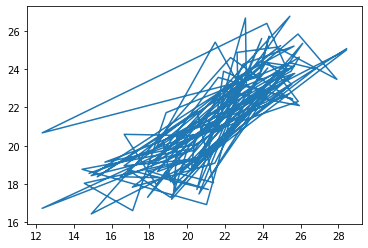

In [312]:
plt.plot(y_test,y_pred_gb)

In [313]:
y_list = list(y_test)

In [314]:
y_p_list = list(y_pred_xgb)

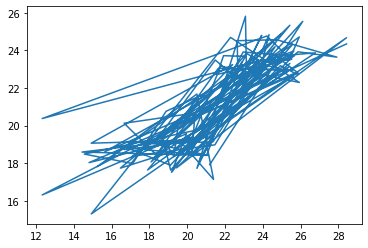

In [315]:
plt.plot(y_list,y_p_list)